# Selection versus lineage size

In [231]:
from __future__ import division
import sys
import os
import time
import copy
import pickle

import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import seaborn as sns

import bct

output_dir = "/scratch/Bcell_selection/figures/v8/outs"
output_suffix = ""
output_formats = [".pdf", ".png"]

def save_figure(fig, name, output_dir, output_suffix, output_formats, savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.2}
mpl.rc('savefig', dpi=300)

mpl.rcParams['figure.dpi']= 300

sns.set_style("ticks")
sns.set_context("talk")

myColors = ["#E69F00", "#56B4E9", "#D55E00", "#009E73", "#7570b3", "#e31a1c", "#fb9a99", "#cab2d6"]

# Load data

In [2]:
# Lineage dynamics data
df_expanded = pd.read_csv("data/df_expanded.filtered.csv", index_col=0)
df_persistent = pd.read_csv("data/df_persistent.filtered.csv", index_col=0)

print "Lineages"
print "Expanded", df_expanded.shape[0]
print "Persistent", df_persistent.shape[0]

Lineages
Expanded 87
Persistent 192


In [3]:
# Load frequencies of mutations for all lineages
freqs = pickle.load(open("data/SFS_Bulk_freqs.pickle"))

# Load number of leaves in each lineage
lineage_sizes = pickle.load(open("data/SFS_Bulk_lineage_sizes.pickle"))

In [4]:
# Metrics of selection
df_metrics = pd.read_csv("data/df_metrics.slim.csv", index_col=0)
df_metrics.head()

,label_dynamics,num_seq,H,H_pvalue_kingman,H_pvalue_neutralExpanding,num_seq_bin
lineage_uid,,,,,,
70201010000000001,Vaccine-responsive,9166,-14.499747,0.000571,2.096066e-10,10000
20201010000000001,Vaccine-responsive,15632,18.579027,1.000000,1.000000e+00,10000
20201010000000267,Vaccine-responsive,5722,17.182397,1.000000,1.000000e+00,5000
60201010000000781,Vaccine-responsive,6943,3.886945,0.999978,4.189248e-03,5000
20201010000000362,Vaccine-responsive,6586,23.854739,1.000000,1.000000e+00,5000


In [172]:
# Subclones selected
df_metrics_subclonesSelected = pd.read_csv("../v5/data/df_metrics_subclonesSelected.csv", index_col=0)
df_metrics_subclonesSelected.head()

,label_dynamics,num_seq,H,H_pvalue_kingman,D,D_pvalue_kingman,num_subclones_selected
lineage_uid,,,,,,,
80201010000044651,Persistent,153,14.816821,1.000000,-1.512397,0.975310,0
80201010000045040,Persistent,142,11.799421,1.000000,-inf,1.000000,0
70201010000000067,Persistent,8286,-6.565668,0.005688,-0.065684,0.168681,0
80201010000047695,Persistent,288,18.015389,1.000000,-inf,1.000000,0
80201010000004410,Persistent,176,10.854286,1.000000,-0.717539,0.703704,0


# Examine whether size has any systematic effect on detection of selection

In [5]:
# Sort lineages by size
df_metrics.sort_values(by="num_seq", ascending=True, inplace=True)

df_metrics_expanded = df_metrics.loc[df_metrics["label_dynamics"] == "Vaccine-responsive"]
df_metrics_persistent = df_metrics.loc[df_metrics["label_dynamics"] == "Persistent"]

df_metrics.head()

,label_dynamics,num_seq,H,H_pvalue_kingman,H_pvalue_neutralExpanding,num_seq_bin
lineage_uid,,,,,,
60201010000012295,Persistent,100,19.213737,1.000000,1.000000,100
60201010000089359,Persistent,101,10.015446,1.000000,0.999978,100
20201010000088542,Persistent,101,10.531683,1.000000,0.999987,100
70201010000033334,Vaccine-responsive,103,-9.300781,0.002835,0.000005,100
60201010000098592,Persistent,103,10.491338,1.000000,0.999986,100


Correlation between sequences and P value
SpearmanrResult(correlation=0.06406786090733771, pvalue=0.2862266957153693)
Correlation between sequences and P value, log-log
SpearmanrResult(correlation=0.06406786090733771, pvalue=0.2862266957153693)


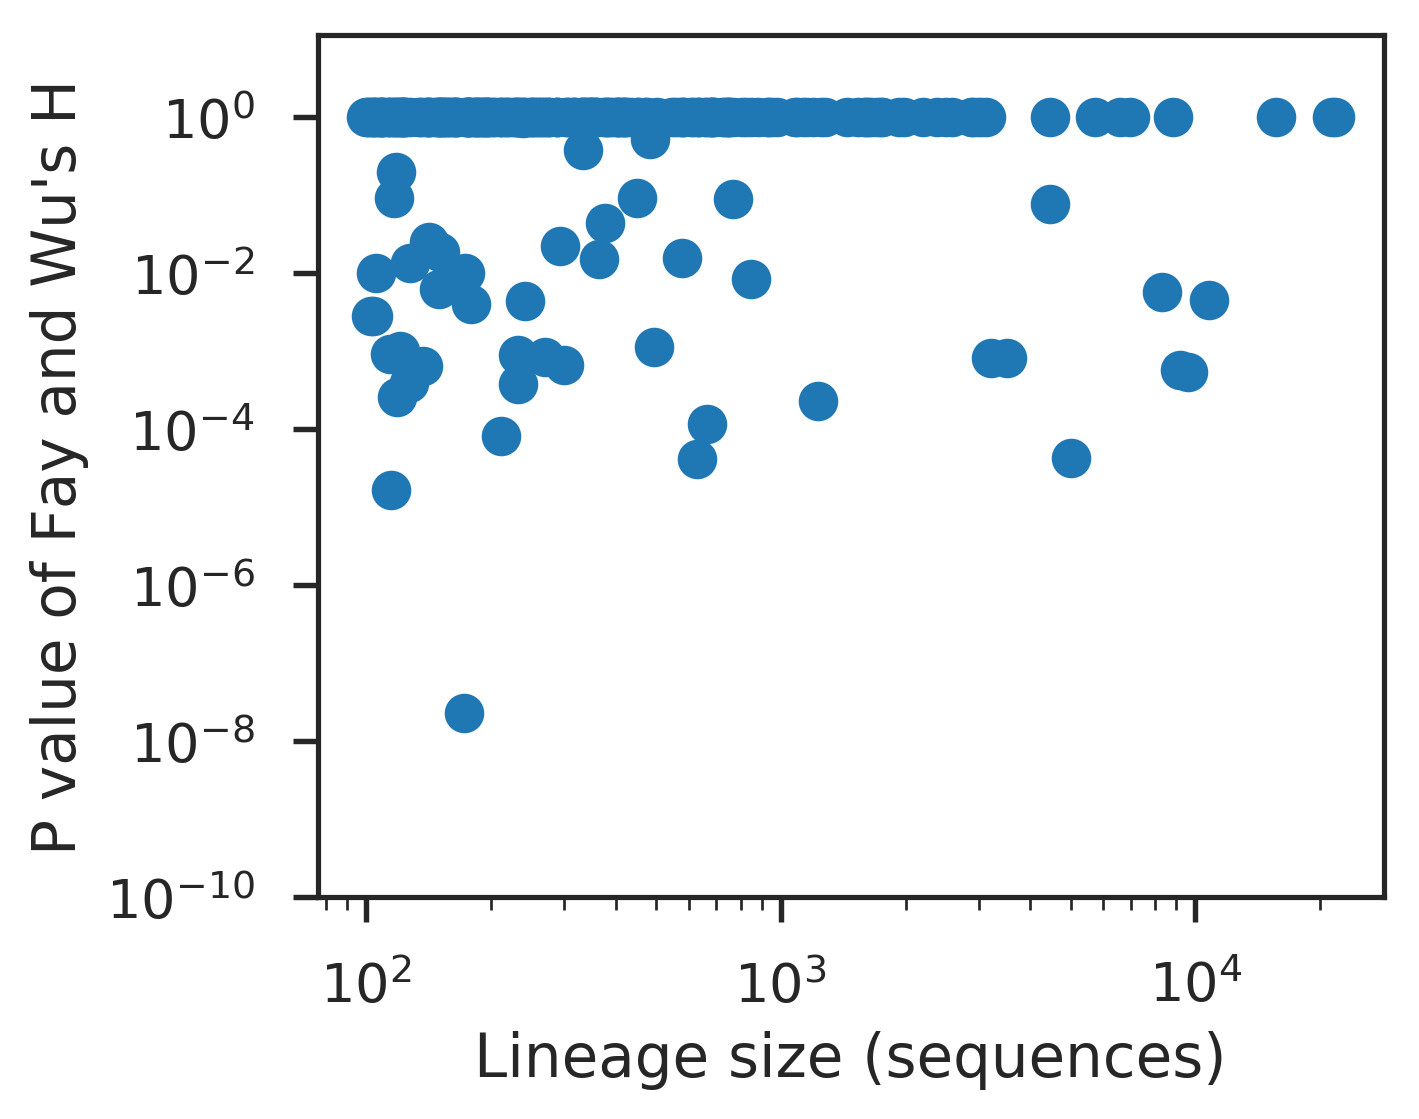

In [217]:
y = df_metrics["H_pvalue_kingman"]
x = df_metrics["num_seq"]

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-10)
ax.set_xlabel("Lineage size (sequences)")
ax.set_ylabel("P value of Fay and Wu's H")
plt.tight_layout()

print "Correlation between sequences and P value"
print scipy.stats.spearmanr(x, y)

print "Correlation between sequences and P value, log-log"
print scipy.stats.spearmanr(np.log10(x), np.log10(y))

# Log makes no difference, as expected (Rank correlation)

# Separate VR and P lineages

Correlation between sequences and P value
(0.04655195602251984, 0.6685348291956263)
Correlation between sequences and P value
(-0.17372440049581536, 0.015959960340584972)


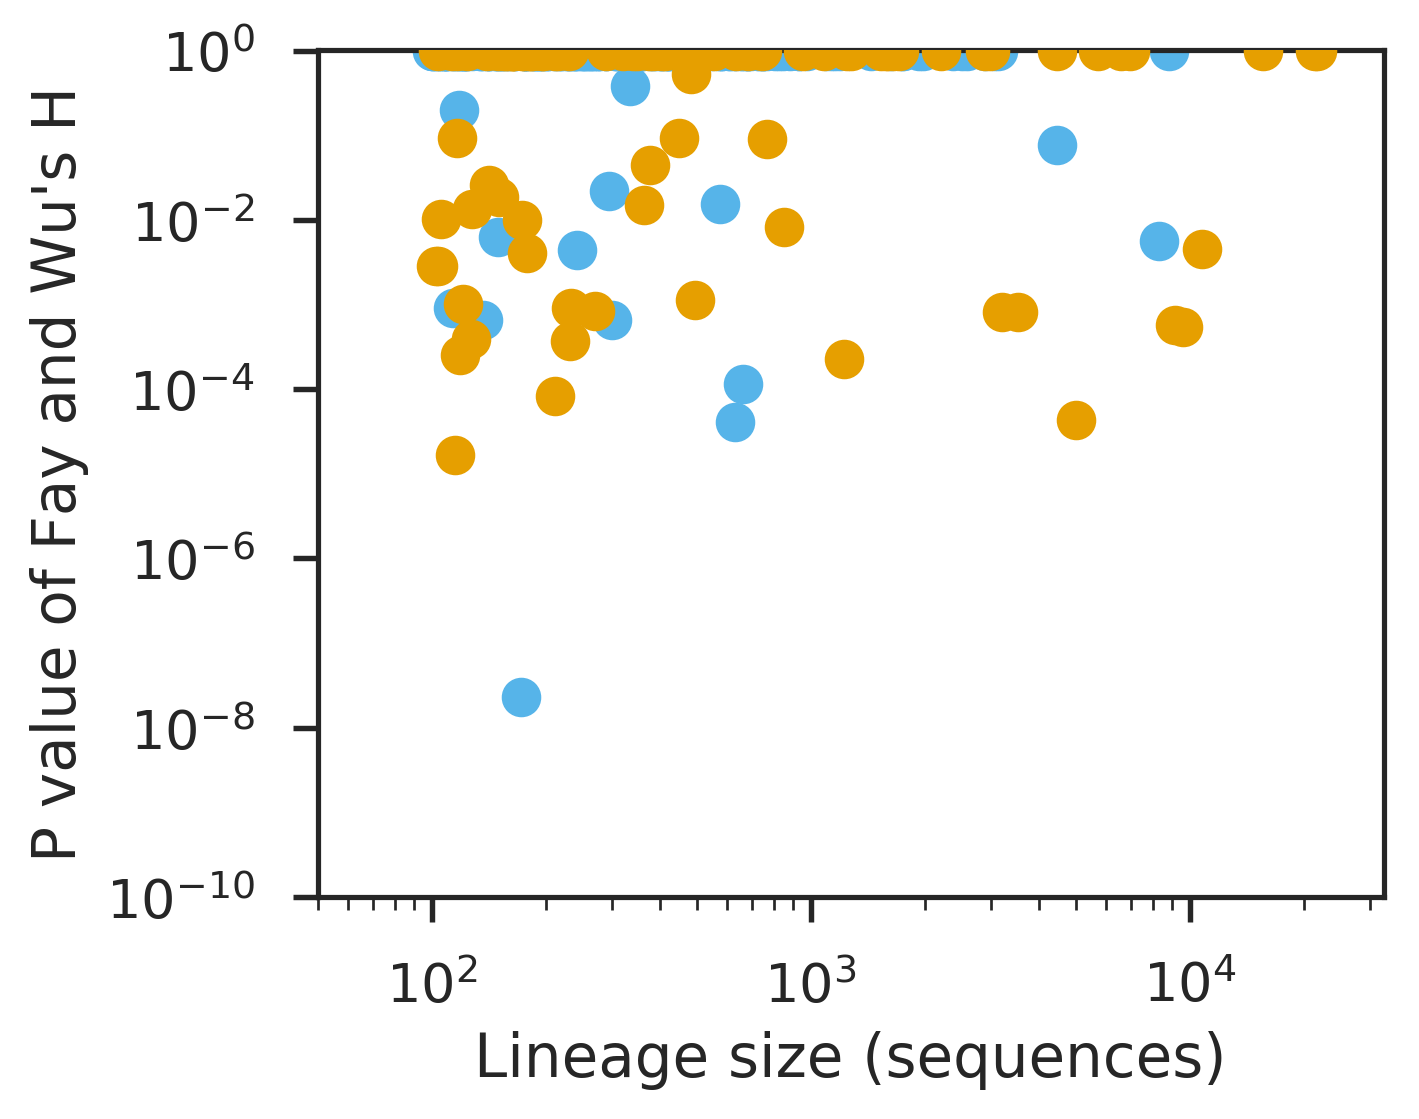

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

y = df_metrics_expanded["H_pvalue_kingman"]
x = df_metrics_expanded["num_seq"]
ax.scatter(x, y, c=myColors[0], zorder=10)

print "Correlation between sequences and P value"
print scipy.stats.pearsonr(x, y)


y = df_metrics_persistent["H_pvalue_kingman"]
x = df_metrics_persistent["num_seq"]
ax.scatter(x, y, c=myColors[1])

print "Correlation between sequences and P value"
print scipy.stats.pearsonr(x, y)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-10)
ax.set_xlim(left=50)
ax.set_xlabel("Lineage size (sequences)")
ax.set_ylabel("P value of Fay and Wu's H")
plt.tight_layout()

# Analysis of size versus selection after removing multiple subclone selected lineages

In [191]:
selector = df_metrics_subclonesSelected["num_subclones_selected"] < 2
df_metrics_subclonesSelected_oneSubclone = df_metrics_subclonesSelected.loc[selector]
print df_metrics_subclonesSelected_oneSubclone.shape
df_metrics_subclonesSelected_oneSubclone.head()

df_metrics_subclonesSelected_oneSubclone_expanded = df_metrics_subclonesSelected_oneSubclone.loc[df_metrics_subclonesSelected_oneSubclone["label_dynamics"] == "Vaccine-responsive"]
df_metrics_subclonesSelected_oneSubclone_persistent = df_metrics_subclonesSelected_oneSubclone.loc[df_metrics_subclonesSelected_oneSubclone["label_dynamics"] == "Persistent	"]

(269, 7)


2.30978615551e-08
Correlation between sequences and P value
SpearmanrResult(correlation=0.03253597336810607, pvalue=0.5952210780175138)
Correlation between sequences and P value, log-log
SpearmanrResult(correlation=0.03253597336810607, pvalue=0.5952210780175138)


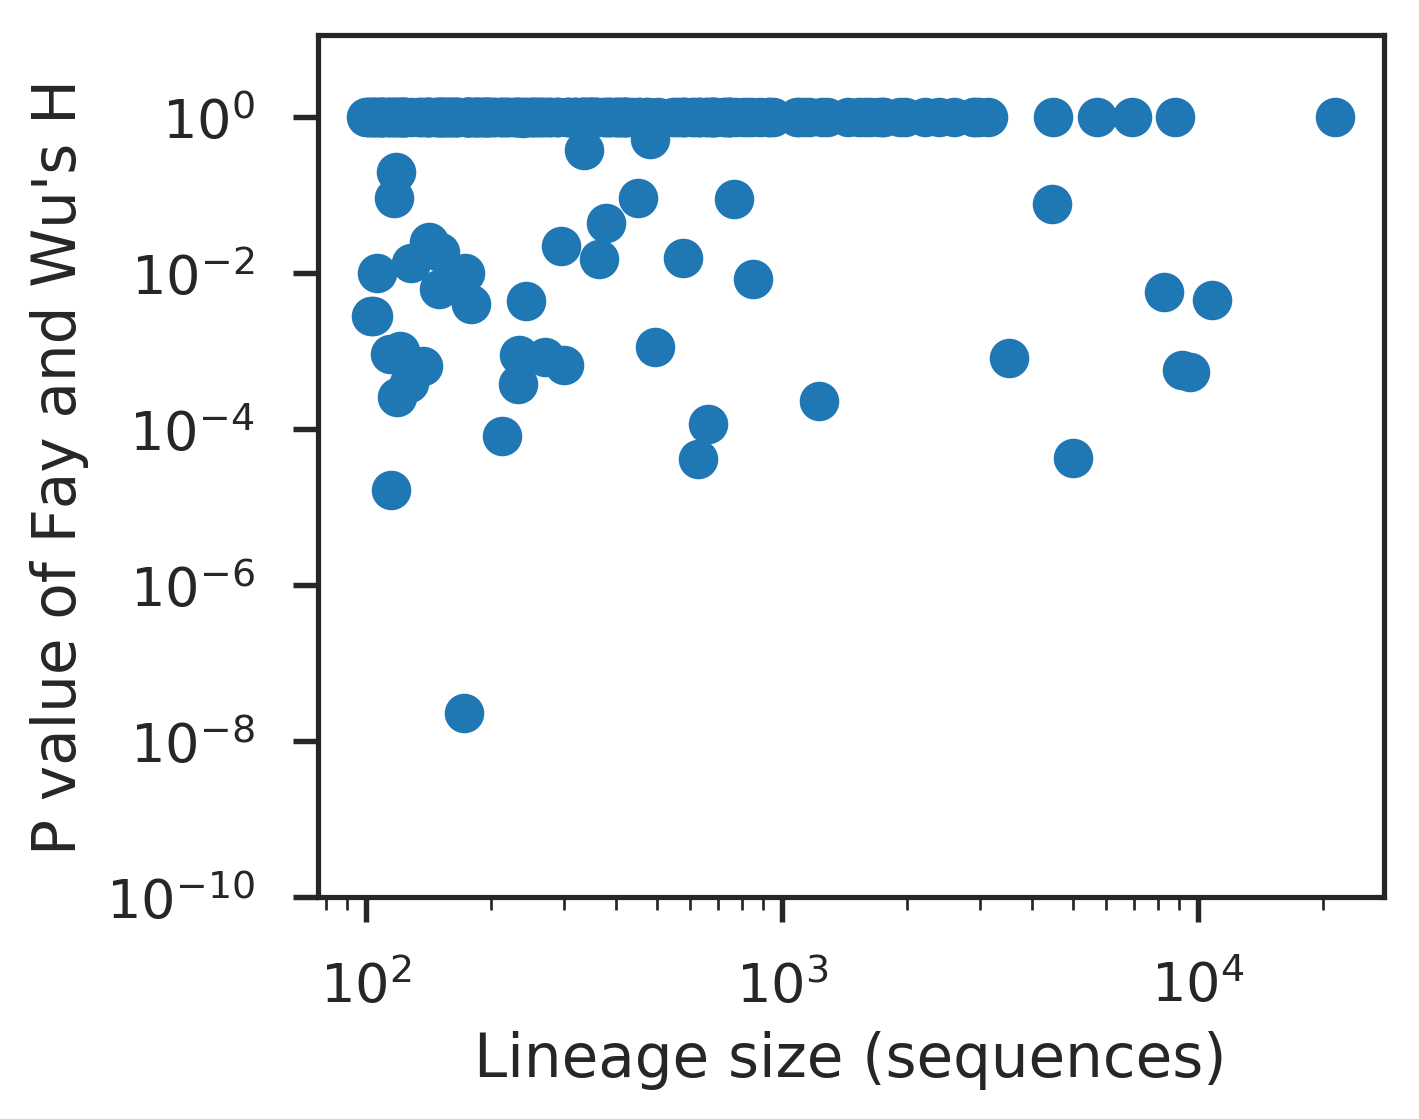

In [192]:
y = df_metrics_subclonesSelected_oneSubclone["H_pvalue_kingman"]
# x = range(1, len(y)+1)
x = df_metrics_subclonesSelected_oneSubclone["num_seq"]

print min(y)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-10)
ax.set_xlabel("Lineage size (sequences)")
ax.set_ylabel("P value of Fay and Wu's H")
plt.tight_layout()

print "Correlation between sequences and P value"
print scipy.stats.spearmanr(x, y)

print "Correlation between sequences and P value, log-log"
print scipy.stats.spearmanr(np.log10(x), np.log10(y))

# Log makes no difference, as expected (Rank correlation)

Correlation between sequences and P value
(-0.04336695005024259, 0.7006693382127704)
Correlation between sequences and P value
(nan, nan)


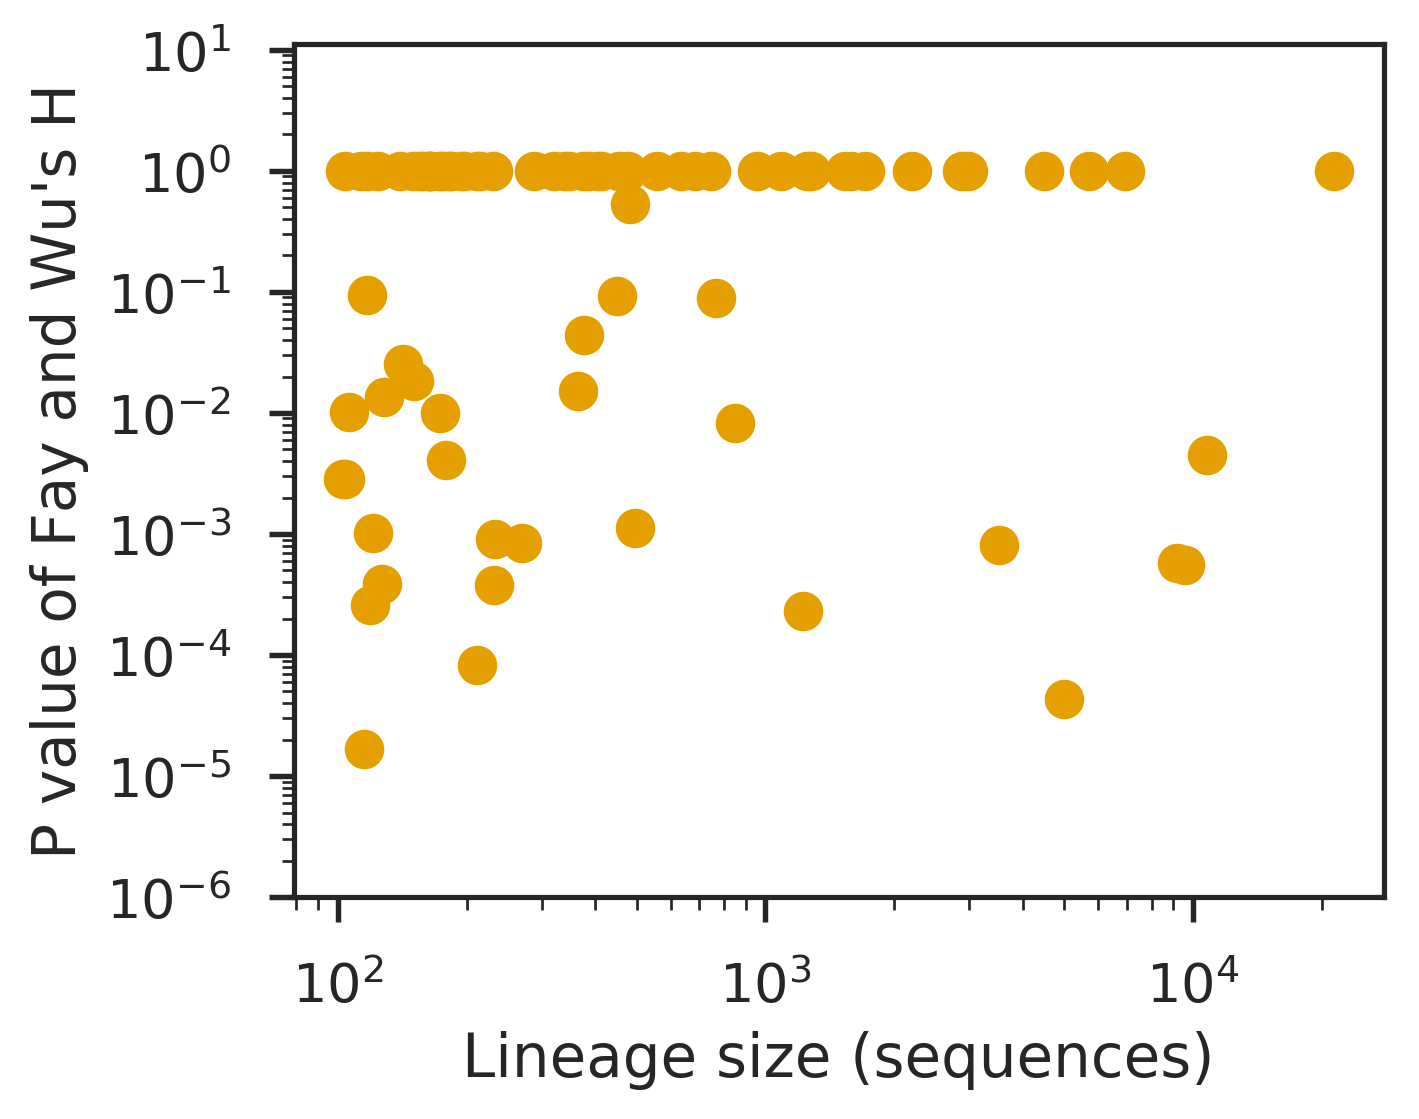

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

y = df_metrics_subclonesSelected_oneSubclone_expanded["H_pvalue_kingman"]
x = df_metrics_subclonesSelected_oneSubclone_expanded["num_seq"]
ax.scatter(x, y, c=myColors[0], zorder=10)

print "Correlation between sequences and P value"
print scipy.stats.pearsonr(x, y)

y = df_metrics_subclonesSelected_oneSubclone_persistent["H_pvalue_kingman"]
x = df_metrics_subclonesSelected_oneSubclone_persistent["num_seq"]
ax.scatter(x, y, c=myColors[1])

print "Correlation between sequences and P value"
print scipy.stats.pearsonr(x, y)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-6)
ax.set_xlabel("Lineage size (sequences)")
ax.set_ylabel("P value of Fay and Wu's H")
plt.tight_layout()

In [ ]:
# Calc fraction of lineages detected as selected in each bin


In [212]:
df_metrics_subclonesSelected_oneSubclone_expanded["selected"] = df_metrics_subclonesSelected_oneSubclone_expanded["H_pvalue_kingman"] < 0.05
df_metrics_subclonesSelected_oneSubclone_expanded.head()

/scratch/resources/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,label_dynamics,num_seq,H,H_pvalue_kingman,D,D_pvalue_kingman,num_subclones_selected,selected,num_seq_bins
lineage_uid,,,,,,,,,
80201010000061255,Vaccine-responsive,124,16.413585,1.000000,-1.221729,0.945382,0,False,0
70201010000023370,Vaccine-responsive,163,11.269030,1.000000,-inf,1.000000,0,False,0
80201010000047325,Vaccine-responsive,377,-2.416968,0.044383,0.756287,0.060150,0,True,0
60201010000028794,Vaccine-responsive,1584,5.243120,0.999986,1.008736,0.017504,0,False,2
60201010000078881,Vaccine-responsive,557,10.409949,1.000000,-0.258517,0.427040,0,False,1


In [213]:
bins = [100, 500, 1000, 5000, 10000, 50000]
num_seq_bins = pd.cut(df_metrics_subclonesSelected_oneSubclone_expanded["num_seq"], bins=bins, labels=False)
df_metrics_subclonesSelected_oneSubclone_expanded["num_seq_bins"] = num_seq_bins
df_metrics_subclonesSelected_oneSubclone_expanded.groupby("num_seq_bins")["selected"].value_counts(normalize=True)

/scratch/resources/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


num_seq_bins  selected
0             False       0.654545
              True        0.345455
1             False       0.857143
              True        0.142857
2             False       0.769231
              True        0.230769
3             False       0.500000
              True        0.500000
4             False       0.500000
              True        0.500000
Name: selected, dtype: float64

# Examine size versus selection including rest lineages

In [220]:
df_metrics_epr = pd.read_csv("data/df_metrics_epr.csv", index_col=0)

In [221]:
df_metrics_epr.head()

,label_dynamics,num_seq,H,H_pvalue_kingman,H_pvalue_neutralExpanding
lineage_uid,,,,,
70201010000000001,Vaccine-responsive,9166,-14.499747,0.000571,2.096066e-10
20201010000000001,Vaccine-responsive,15632,18.579027,1.000000,1.000000e+00
20201010000000267,Vaccine-responsive,5722,17.182397,1.000000,1.000000e+00
60201010000000781,Vaccine-responsive,6943,3.886945,0.999978,4.189248e-03
20201010000000362,Vaccine-responsive,6586,23.854739,1.000000,1.000000e+00


Correlation between sequences and P value
(-0.07946252949607563, 0.0922532798891597)


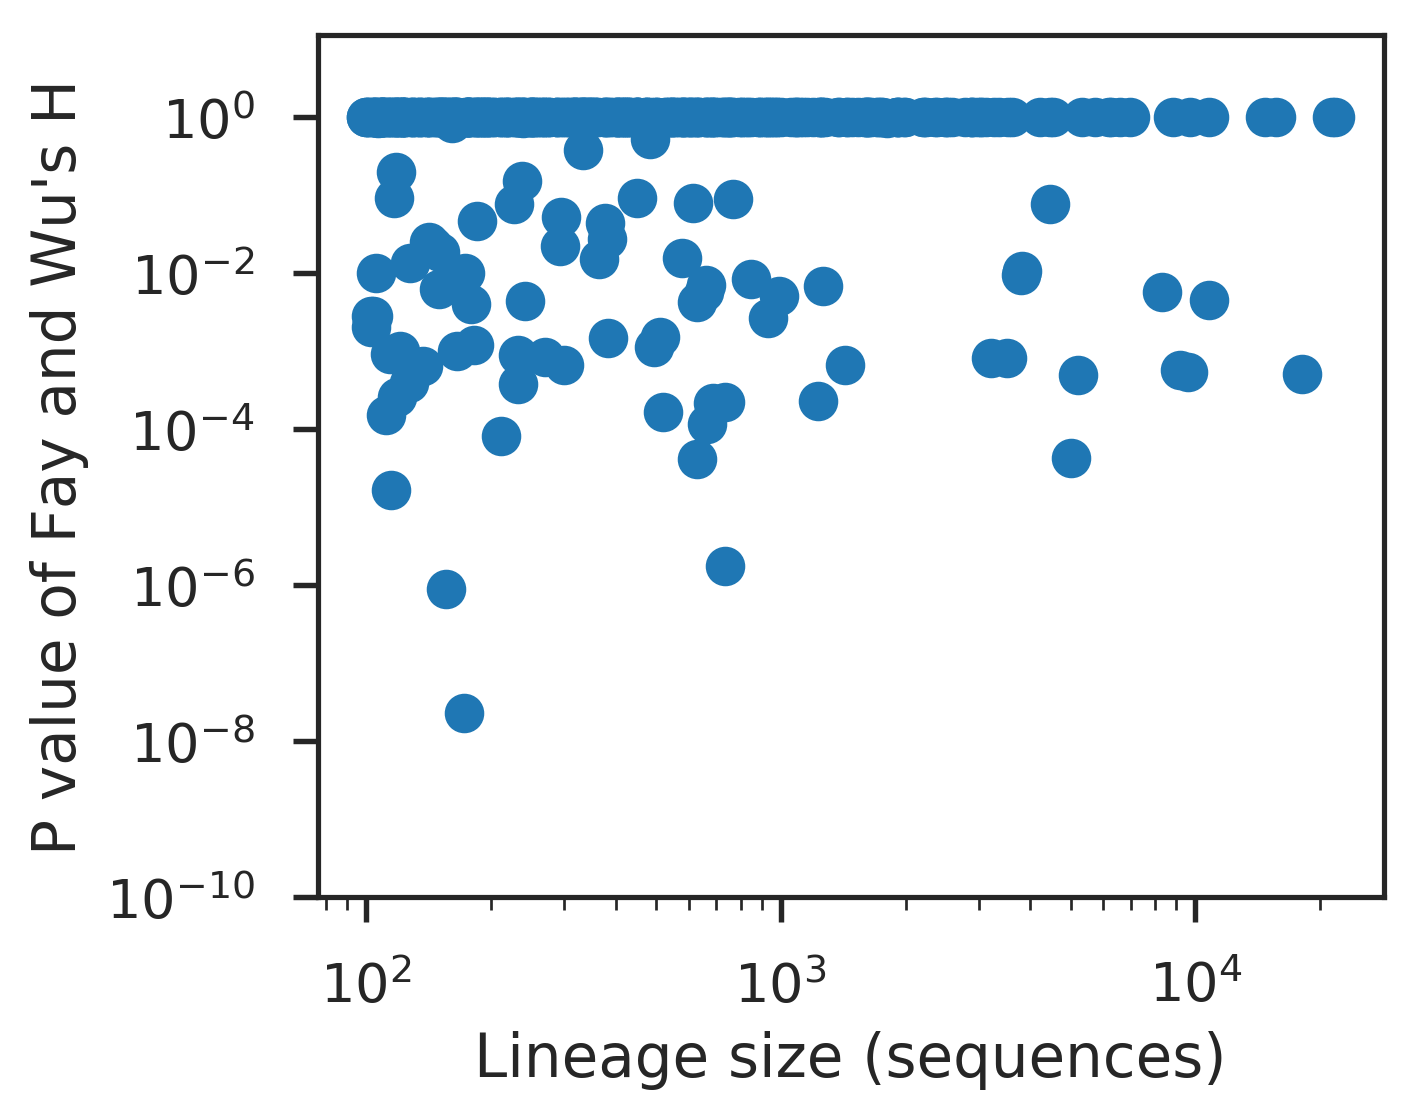

In [227]:
x = df_metrics_epr["num_seq"]
y = df_metrics_epr["H_pvalue_kingman"]

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(x, y)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-10)
ax.set_xlabel("Lineage size (sequences)")
ax.set_ylabel("P value of Fay and Wu's H")
plt.tight_layout()

print "Correlation between sequences and P value"
print scipy.stats.pearsonr(x, y)

In [229]:
# Split into subsets and plot colored
df_metrics_epr_expanded = df_metrics_epr.loc[df_metrics_epr["label_dynamics"] == "Vaccine-responsive"]
df_metrics_epr_persistent = df_metrics_epr.loc[df_metrics_epr["label_dynamics"] == "Persistent"]
df_metrics_epr_rest = df_metrics_epr.loc[df_metrics_epr["label_dynamics"] == "Rest"]

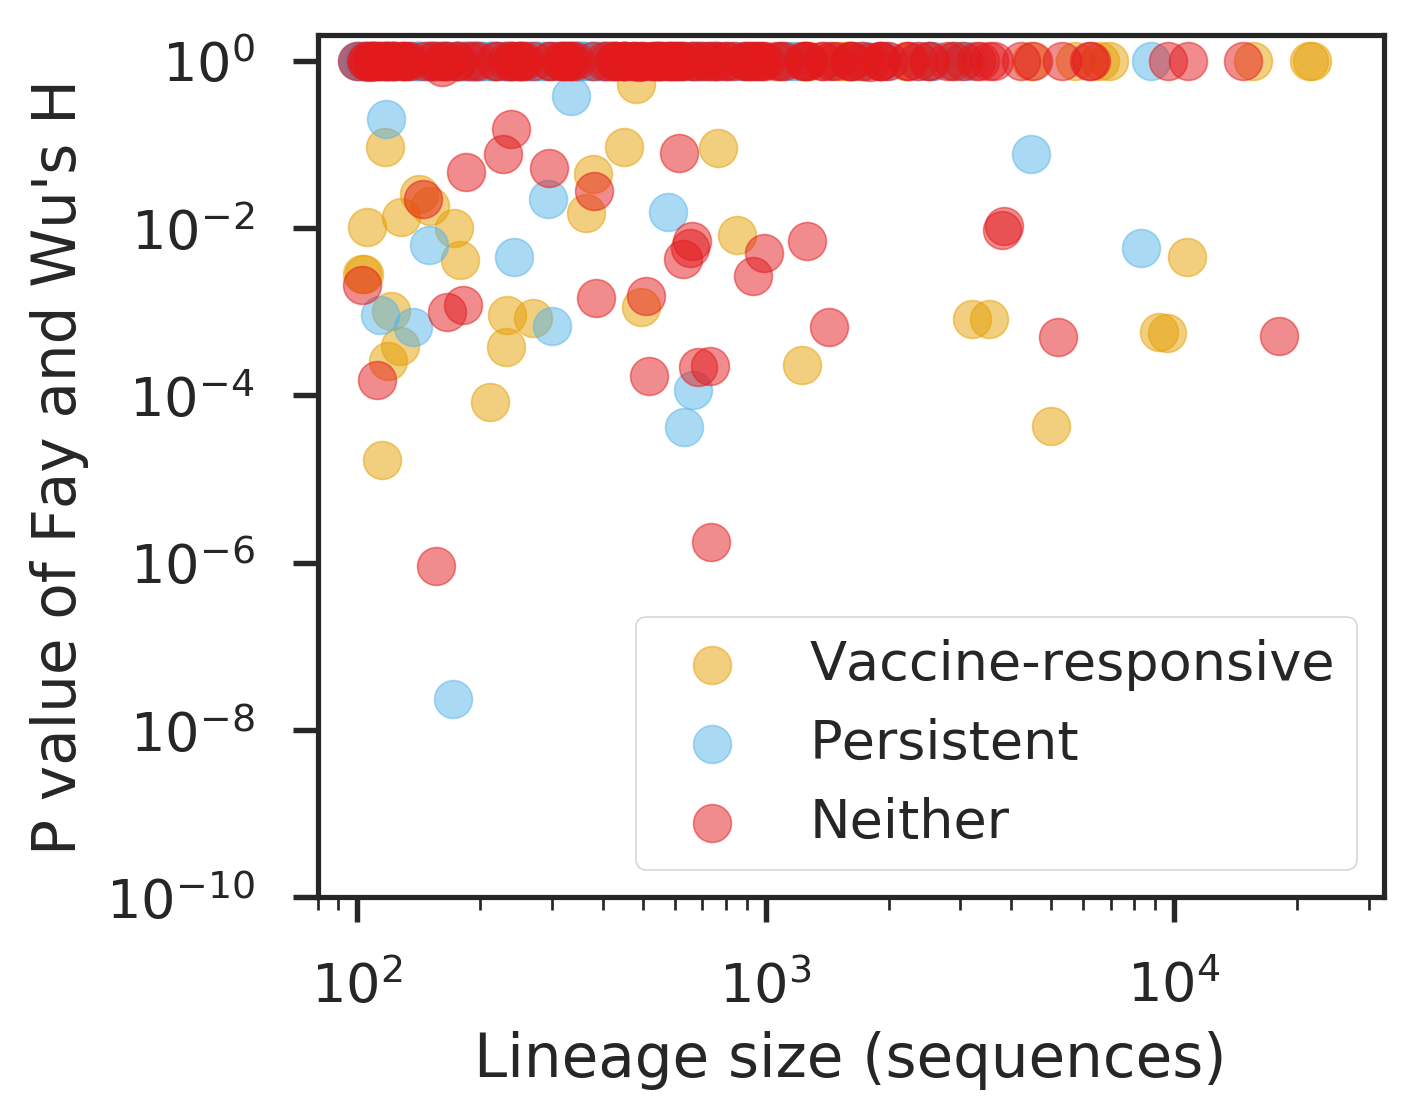

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))

x = df_metrics_epr_expanded["num_seq"]
y = df_metrics_epr_expanded["H_pvalue_kingman"]
ax.scatter(x, y, c=myColors[0], label="Vaccine-responsive", alpha=0.5)

x = df_metrics_epr_persistent["num_seq"]
y = df_metrics_epr_persistent["H_pvalue_kingman"]
ax.scatter(x, y, c=myColors[1], label="Persistent", alpha=0.5)

x = df_metrics_epr_rest["num_seq"]
y = df_metrics_epr_rest["H_pvalue_kingman"]
ax.scatter(x, y, c=myColors[5], label="Neither", alpha=0.5)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-10, top=2)
ax.set_xlim(left=80)
ax.set_xlabel("Lineage size (sequences)")
ax.set_ylabel("P value of Fay and Wu's H")
ax.legend(loc="lower right", frameon=True)

plt.tight_layout()

# Analysis of selection versus total branch length

## Calculate total branch length of each lineage

In [88]:
from Bio import Phylo
import glob

# Find all trees

infiles_dir = "/scratch/Bcell_selection/data/trees"

filenames_trees = glob.glob(infiles_dir + "/*/fasttree.rep.named.nwk")
lineage_uids = [x.split("/")[5] for x in filenames_trees]

# Calculate total branch length for each tree

total_branch_lengths = {}

for infile in filenames_trees:
    T = Phylo.read(infile, "newick")
    lineage_uid = infile.split("/")[5]
    L = T.total_branch_length()
    total_branch_lengths[lineage_uid] = L
    
# Add information to dataframe

col_total_branch_lengths = []
for x in df_metrics.index:
    x = str(x)
    if x in total_branch_lengths:
        col_total_branch_lengths.append(total_branch_lengths[x])
    else:
        col_total_branch_lengths.append(np.nan)
        
df_metrics["total_branch_length"] = col_total_branch_lengths

df_metrics.head()

,label_dynamics,num_seq,H,H_pvalue_kingman,H_pvalue_neutralExpanding,num_seq_bin,total_branch_length
lineage_uid,,,,,,,
60201010000012295,Persistent,100,19.213737,1.000000,1.000000,100,1.56352
60201010000089359,Persistent,101,10.015446,1.000000,0.999978,100,1.24641
20201010000088542,Persistent,101,10.531683,1.000000,0.999987,100,4.13713
70201010000033334,Vaccine-responsive,103,-9.300781,0.002835,0.000005,100,0.43483
60201010000098592,Persistent,103,10.491338,1.000000,0.999986,100,1.98045


In [89]:
df_metrics_expanded = df_metrics.loc[df_metrics["label_dynamics"] == "Vaccine-responsive"]
df_metrics_persistent = df_metrics.loc[df_metrics["label_dynamics"] == "Persistent"]

## Examine properties of total branch length 

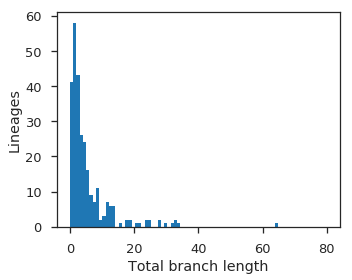

In [98]:
# Distribution of total branch lengths

x = df_metrics["total_branch_length"].dropna()
bins = np.linspace(0, 80, 80)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(x, bins=bins)
ax.set_xlabel("Total branch length")
ax.set_ylabel("Lineages")
plt.tight_layout()

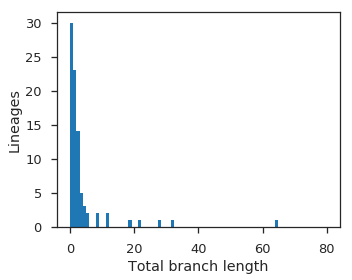

In [99]:
# Distribution of total branch lengths, VR

x = df_metrics_expanded["total_branch_length"].dropna()
bins = np.linspace(0, 80, 80)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(x, bins=bins)
ax.set_xlabel("Total branch length")
ax.set_ylabel("Lineages")
plt.tight_layout()

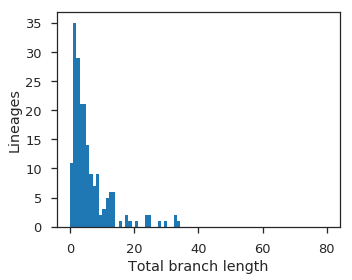

In [100]:
# Distribution of total branch lengths, P

x = df_metrics_persistent["total_branch_length"].dropna()
bins = np.linspace(0, 80, 80)

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(x, bins=bins)
ax.set_xlabel("Total branch length")
ax.set_ylabel("Lineages")
plt.tight_layout()

Correlation between sequences and total branch length, VR
(0.7963411753018885, 4.929558184088097e-20)
Correlation between sequences and total branch length, P
(0.2883289320262001, 5.000988029844037e-05)
Correlation between sequences and total branch length, all lineages
(0.5137795622908985, 3.959949756489959e-20)


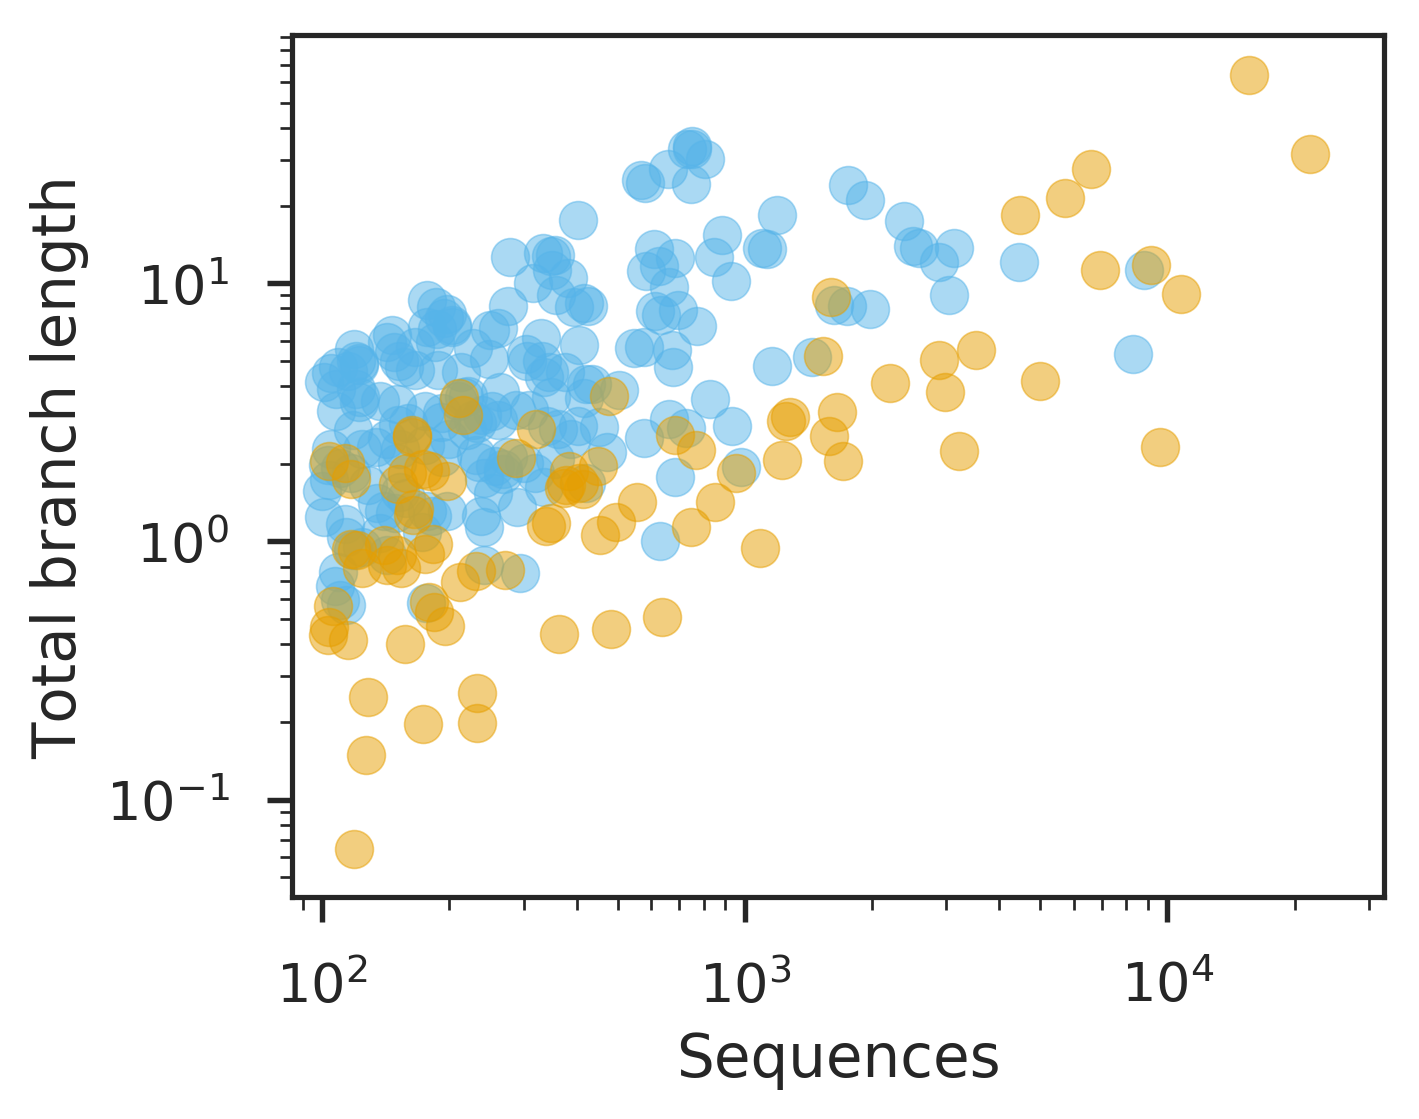

In [141]:
# Correlation of total branch length and number of sequences

fig, ax = plt.subplots(1, 1, figsize=(5,4))

y = df_metrics_expanded["total_branch_length"].dropna()
x = df_metrics_expanded.loc[y.index]["num_seq"]
ax.scatter(x, y, c=myColors[0], alpha=0.5, zorder=10)

x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between sequences and total branch length, VR"
print scipy.stats.pearsonr(x_clean, y_clean)

y = df_metrics_persistent["total_branch_length"].dropna()
x = df_metrics_persistent.loc[y.index]["num_seq"]
ax.scatter(x, y, c=myColors[1], alpha=0.5)

x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between sequences and total branch length, P"
print scipy.stats.pearsonr(x_clean, y_clean)

ax.set_xscale("log")
ax.set_xlim(left=85)
ax.set_yscale("log")

ax.set_xlabel("Sequences")
ax.set_ylabel("Total branch length")
plt.tight_layout()

y = df_metrics["total_branch_length"].dropna()
x = df_metrics.loc[y.index]["num_seq"]
x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between sequences and total branch length, all lineages"
print scipy.stats.pearsonr(x_clean, y_clean)



Correlation between sequences and P value, VR
(0.1800572829705676, 0.09712847112079367)
Correlation between sequences and P value, P
(0.16218347590074397, 0.024607692134945378)
Correlation between sequences and P value, all lineages
(0.20982111702810566, 0.00042840248059797335)


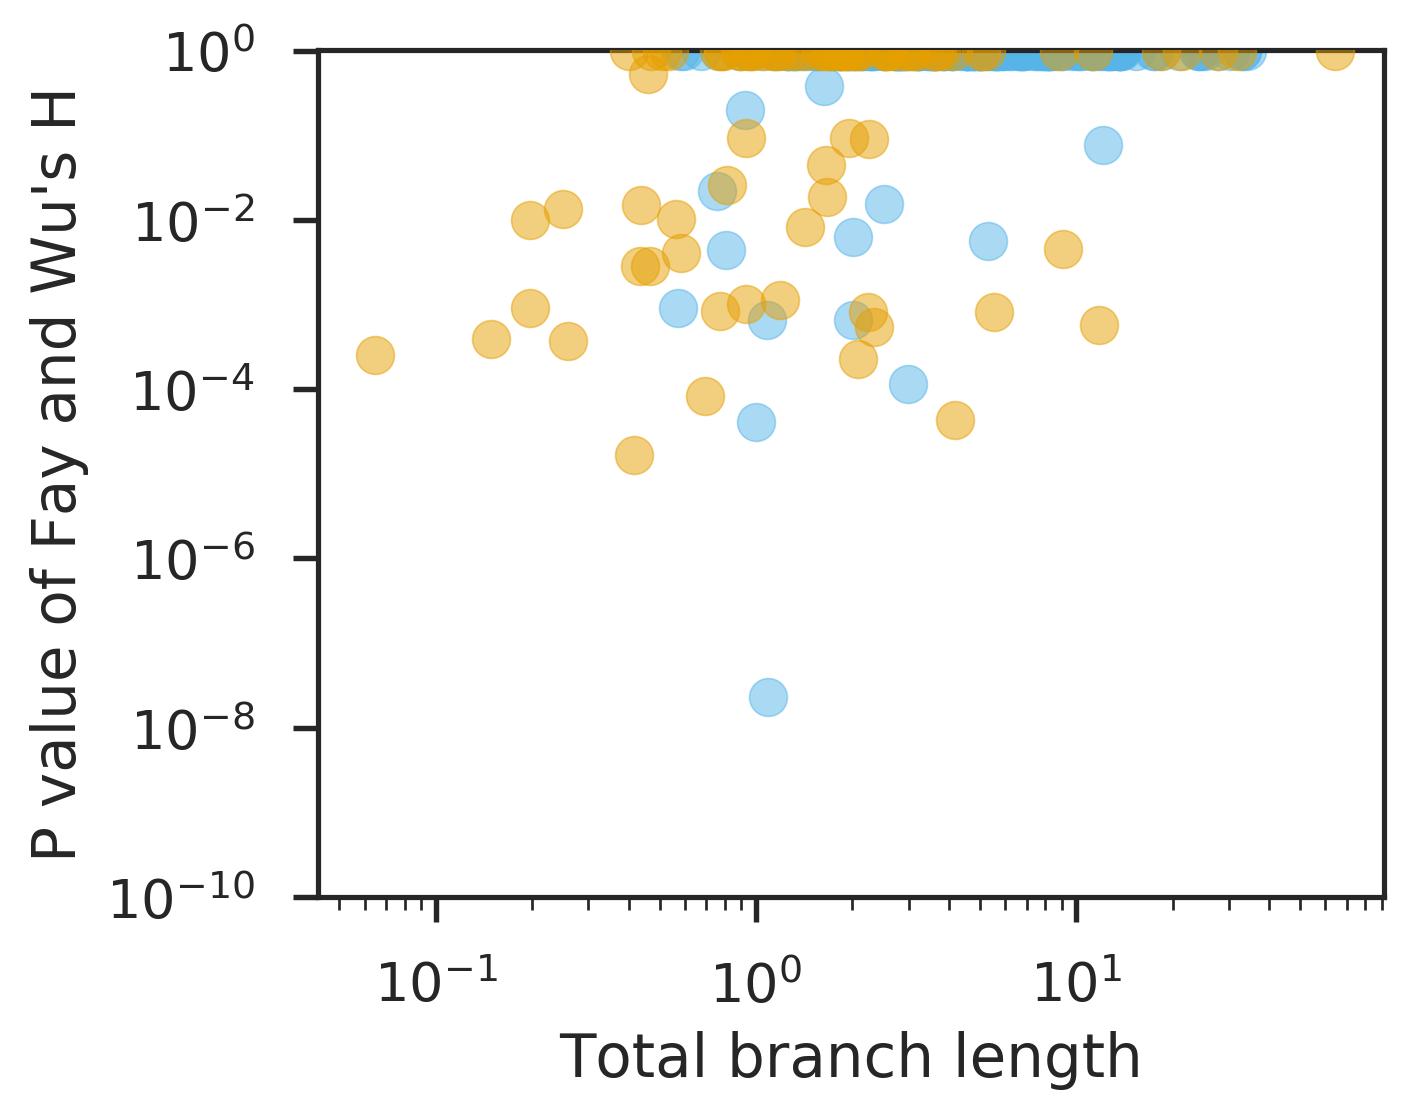

In [244]:
# Total branch length versus selection

fig, ax = plt.subplots(1, 1, figsize=(5,4))

y = df_metrics_expanded["H_pvalue_kingman"]
x = df_metrics_expanded["total_branch_length"]
ax.scatter(x, y, c=myColors[0], zorder=10, alpha=0.5)

x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between sequences and P value, VR"
print scipy.stats.pearsonr(x_clean, y_clean)

y = df_metrics_persistent["H_pvalue_kingman"]
x = df_metrics_persistent["total_branch_length"]
ax.scatter(x, y, c=myColors[1], alpha=0.5)

x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between sequences and P value, P"
print scipy.stats.pearsonr(x_clean, y_clean)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-10)
ax.set_xlabel("Total branch length")
ax.set_ylabel("P value of Fay and Wu's H")
plt.tight_layout()


y = df_metrics["H_pvalue_kingman"]
x = df_metrics["total_branch_length"]
x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between sequences and P value, all lineages"
print scipy.stats.pearsonr(x_clean, y_clean)

Correlation between L and H, VR
(0.2683721895849161, 0.012476346274664575)
Correlation between L and H, P
(0.23397412554489935, 0.0010895185829968214)
Correlation between L and H, all lineages
(0.27104882082897186, 4.538947070143249e-06)


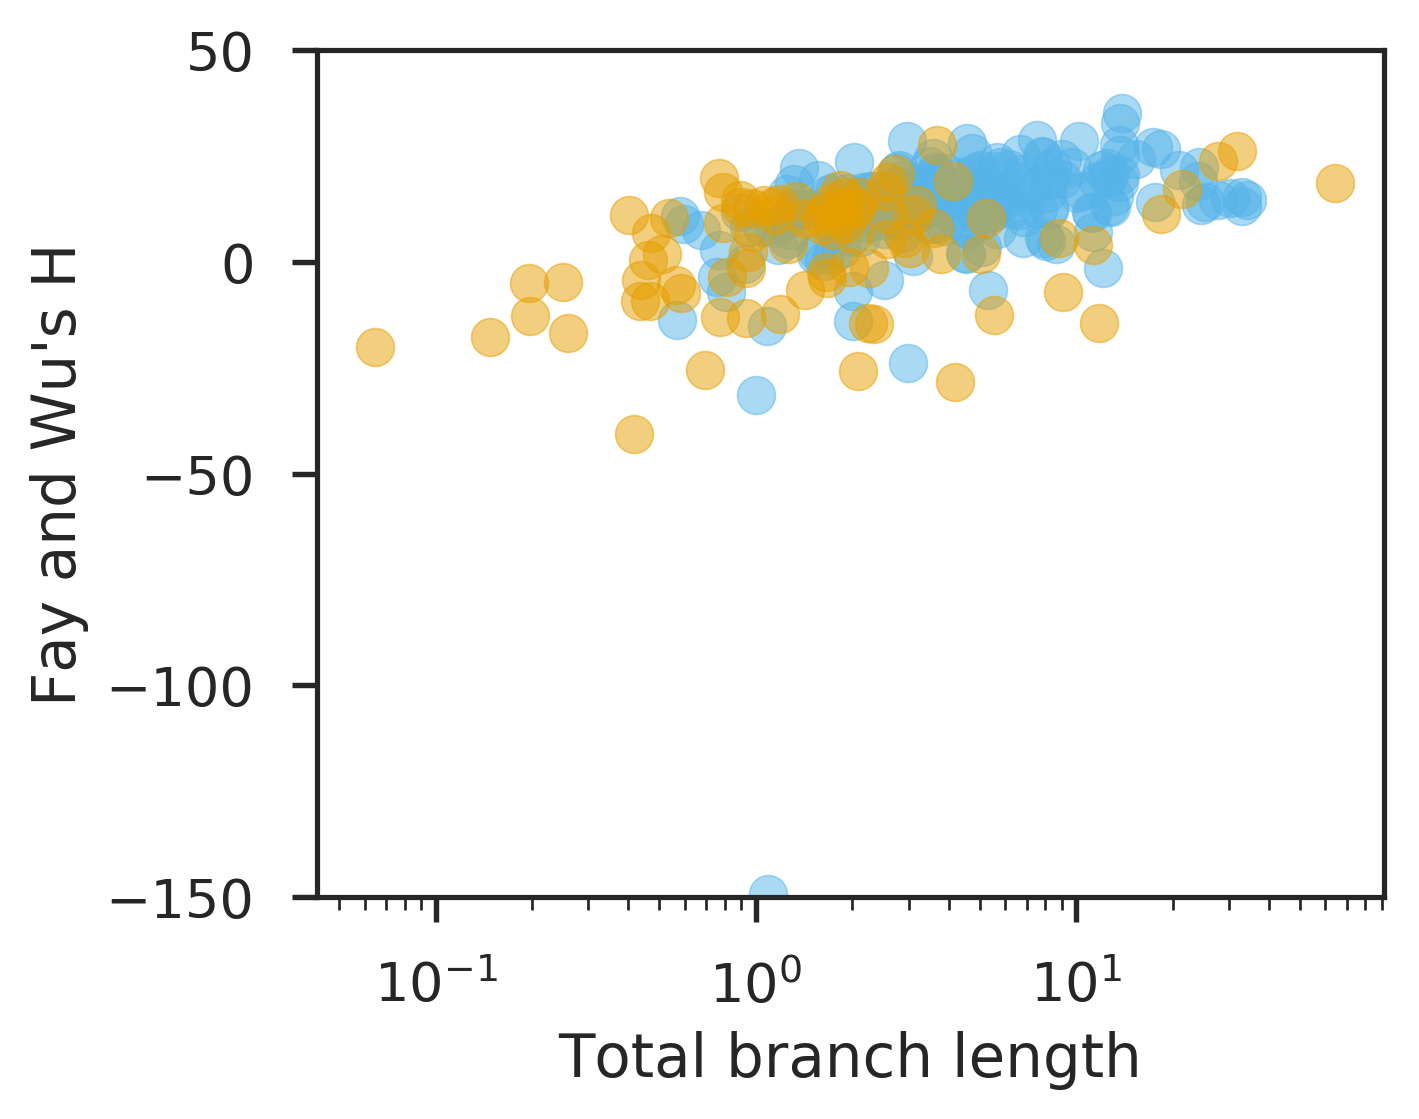

In [143]:
# Total branch length versus selection

fig, ax = plt.subplots(1, 1, figsize=(5,4))

y = df_metrics_expanded["H"]
x = df_metrics_expanded["total_branch_length"]
ax.scatter(x, y, c=myColors[0], zorder=10, alpha=0.5)

x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between L and H, VR"
print scipy.stats.pearsonr(x_clean, y_clean)

y = df_metrics_persistent["H"]
x = df_metrics_persistent["total_branch_length"]
ax.scatter(x, y, c=myColors[1], alpha=0.5)

x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between L and H, P"
print scipy.stats.pearsonr(x_clean, y_clean)

ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_ylim(-150, 50)
ax.set_xlabel("Total branch length")
ax.set_ylabel("Fay and Wu's H")
plt.tight_layout()

y = df_metrics["H"]
x = df_metrics["total_branch_length"]
x_clean = x.dropna()
y_clean = y.loc[x_clean.index]
print "Correlation between L and H, all lineages"
print scipy.stats.pearsonr(x_clean, y_clean)

SpearmanrResult(correlation=0.43083003952569165, pvalue=masked_array(data=0.04531613,
             mask=False,
       fill_value=1e+20))
SpearmanrResult(correlation=-0.03709342701353662, pvalue=0.6094903070663561)


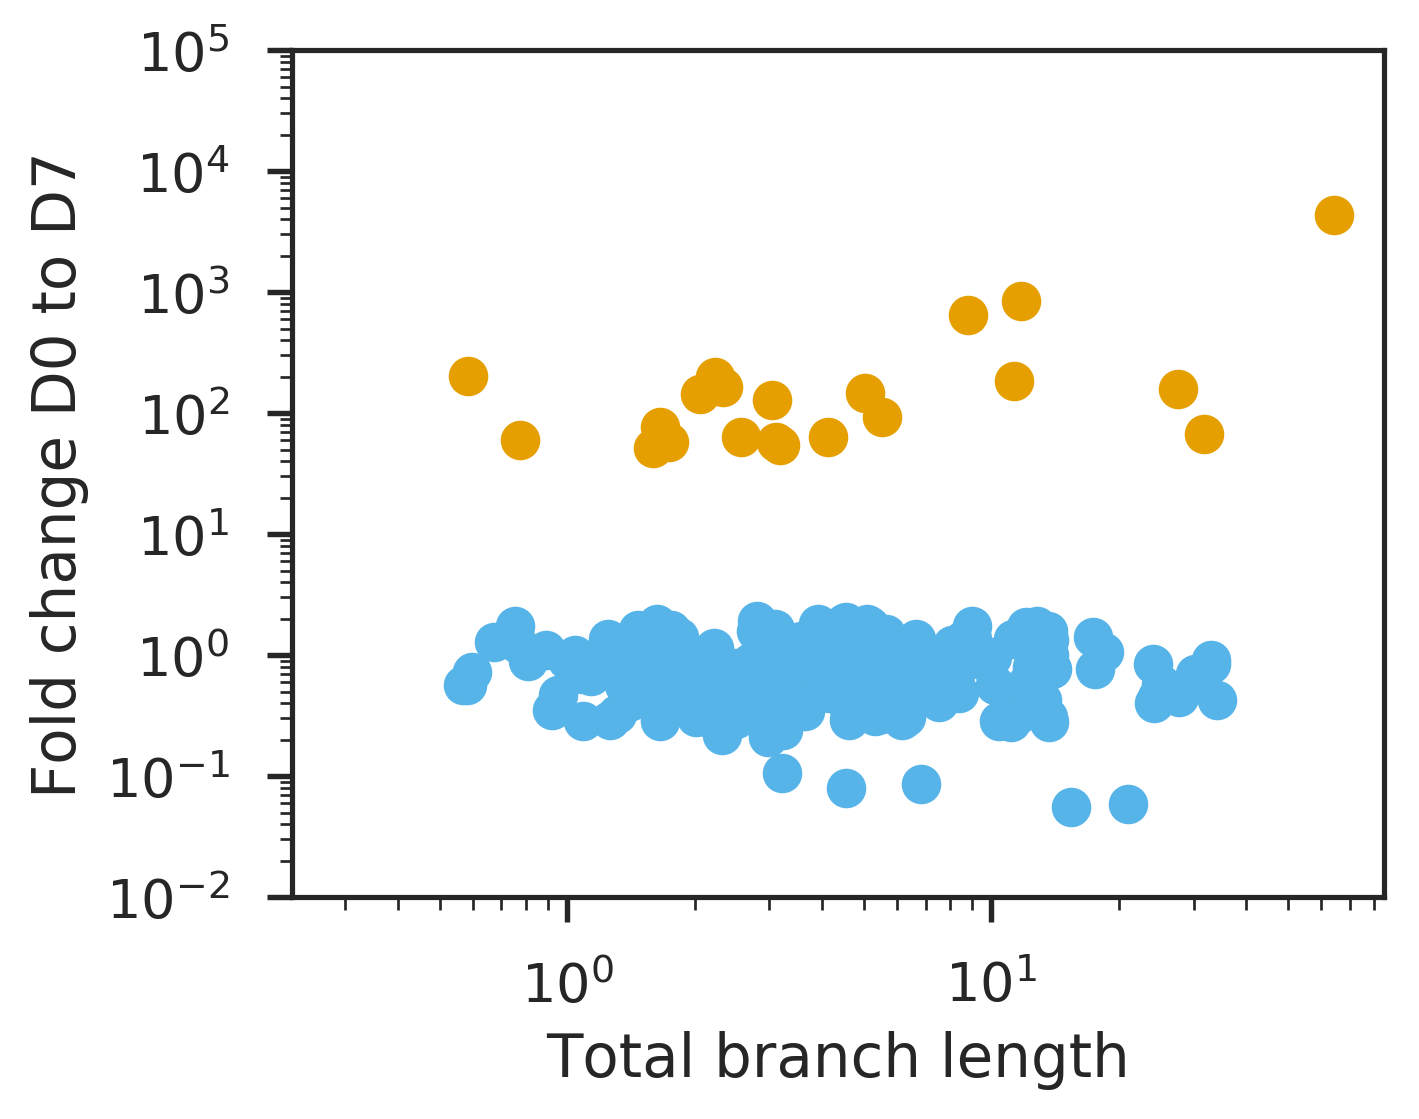

In [168]:
# Does the degree of amplification correlate with the degree of variation within the lineage?

fig, ax = plt.subplots(1, 1, figsize=(5,4))

x = df_metrics.loc[df_expanded.index]["total_branch_length"]
y = df_expanded["V6_V3_ratio"]
ax.scatter(x, y, c=myColors[0])
print scipy.stats.spearmanr(x, y, nan_policy="omit")

x = df_metrics.loc[df_persistent.index]["total_branch_length"]
y = df_persistent["V6_V3_ratio"]
ax.scatter(x, y, c=myColors[1])
print scipy.stats.spearmanr(x, y, nan_policy="omit")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-2, 1e5)
ax.set_xlabel("Total branch length")
ax.set_ylabel("Fold change D0 to D7")

plt.tight_layout()

# Yes, in VR lineages
# No in P lineages

# Makes sense. The most amplified lineages are the most diverse ones.
# Suggests that the process of diversity generation is linked to amplification (which is likely the case for a mutation-expansion process)

# On the other hand, the degree of diversification in persistent lineages is not related to amplification.
# In other words, the most diverse persistent lineages are no less likely to expand after vaccination.
# This seems consistent with neutral diversification that has nothing to do with influenza-responsive expansion